<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## <u> Student Details
#### Name: Akul Arun
#### Student Number: S10243523

# Content
### 1. [Load Data into Jupyter Notebook](#part1)
#### 1.1. [Change data type of  Outlet_Establishment_Year](#part1.1)
#### 1.2. [Standardising format of values of Item_Fat_Content](#part1.2)
#### 1.3. [Finding cardinality of categorical variables](#part1.3)
#### 1.4. [Exploring relationships of the variables with the target variable](#part1.4)
#### 1.5. [Dealing with Outliers in target variable](#part1.5)
### 2. [Train and Test Split](#part2)
### 3. [Missing Value Imputation](#part3)
### 4. [Categorical Data Encoding](#part4)
### 5. [Data Preprocessing](#part5)
#### 5.1. [Transforming Item_Visibility](#part5.1)
#### 5.2. [Transforming Item_MRP](#part5.2)
### 6. [Variable Discretization /Binning](#part6)
### 7. [Feature Engineer](#part7)
#### 7.1. [Dropped Columns](#part7.1)
#### 7.2. [Scaling](#part7.2)
#### 7.3. [Polynomial Expansion](#part7.3)
### 8. [Linear Regression Modelling](#part8)
### 9. [Report](#part9)
#### 9.1. [Introduction/Problem Understanding](#part9.1)
#### 9.2. [Data Exploration](#part9.2)
##### 9.2.1. [Relationship of categorical variables with target variable](#part9.2.1)
##### 9.2.2. [Relationship of numerical variables with target variable](#part9.2.2)
#### 9.3. [Data Cleansing](#part9.3)
##### 9.3.1. [Standardizing values and Changing Data Type](#part9.3.1)
##### 9.3.2. [Missing Data](#part9.3.2)
##### 9.3.3. [Dealing of Outliers in Target Variable](#part9.3.3)
##### 9.3.4. [Outliers in other Numerical Variables](#part9.3.4)
#### 9.4. [Data Transformation](#part9.4)
##### 9.4.1. [Categorical Encoding](#part9.4.1)
##### 9.4.2. [Numerical Variable Transformation](#part9.4.2)
##### 9.4.3. [Binning](#part9.4.3)
#### 9.5. [Feature Engineering](#part9.5)
##### 9.5.1. [Dropping Variables](#part9.5.1)
##### 9.5.2. [Scaling](#part9.5.2)
##### 9.5.3. [Creating new Features](#part9.5.3)
#### 9.6. [Linear Regression Model](#part9.6)
##### 9.6.1. [Encoding Test](#part9.6.1)
##### 9.6.2. [Transformation Test on Item_Visibility](#part9.6.2)
##### 9.6.3. [ransformation Test on Item_MRP](#part9.6.3)
##### 9.6.4. [Binning Test](#part9.6.4)
##### 9.6.5. [Scaling Test](#part9.6.5)
##### 9.6.6. [Polynomial Expansion Test](#part9.6.6)
##### 9.6.7. [Dealing with Outliers of target variable](#part9.6.7)
#### 9.7. [Summary and Future Improvements](#part9.7)

In [1]:
# import the pacakges

# General packages
import pandas as pd
import numpy as np
import warnings

# sklearn preprocess
from sklearn.model_selection import train_test_split

# Visualisation packages
import seaborn as sns
import matplotlib.pyplot as plt

# For Q-Q plots
import scipy.stats as stats

# Impute missing data with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Impute missing data with feature-engine
import feature_engine.imputation as mdi

# Transforming with feature-engine
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# Dealing with outliers with feature-engine
from feature_engine.outliers import Winsorizer

# Discretization with feature-engine
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, CountFrequencyEncoder
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser

# To get mae score to compare the different encoding methods
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

# Scaling 
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

# Expansion
from sklearn.preprocessing import PolynomialFeatures

# PCA
from sklearn.decomposition import PCA

### Step 1: Load Data into Jupyter Notebook <a id="part1"></a>


In [2]:
# Load dataset and showing first 5 rows
supermarket_df=pd.read_csv("supermarket.csv")
supermarket_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Finding out more about the dataset such as number of null values and data type of each variable
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### 1.1 Change data type of  Outlet_Establishment_Year <a id="part1.1"></a>

In [4]:
# I didnt think that the int64 data type was fitting for the Outlet_Establishment_Year so I decided to convert it
# to categorical variable
supermarket_df['Outlet_Establishment_Year']=supermarket_df['Outlet_Establishment_Year'].astype('object')
supermarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), object(8)
memory usage: 799.2+ KB


In [5]:
# Finding out more information about the numerical variables 
supermarket_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


#### 1.2 Standardising format of values of Item_Fat_Content <a id="part1.2"></a>

In [6]:
# Standardising the values in the 'Item_Fat_Content' variable (There were shortforms in the original dataset)
supermarket_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
# As seen above, there were shortforms and different casings
# Replacing shortforms
supermarket_df['Item_Fat_Content']=supermarket_df['Item_Fat_Content'].replace('LF','Low Fat')
supermarket_df['Item_Fat_Content']=supermarket_df['Item_Fat_Content'].replace('reg','Regular')

# Changing lower casing to proper casing
supermarket_df['Item_Fat_Content']=supermarket_df['Item_Fat_Content'].replace('low fat','Low Fat')

In [8]:
supermarket_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### 1.3 Finding cardinality of categorical variables <a id="part1.3"></a>

In [9]:
# Finding the cardinality of categorical columns (Numerical columns will have a lot of unique values)
cat_cols = [c for c in supermarket_df.columns if supermarket_df[c].dtypes=='O']
supermarket_df[cat_cols].nunique()

Item_Identifier              1559
Item_Fat_Content                2
Item_Type                      16
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

#### 1.4 Exploring relationships of the variables with the target variable <a id="part1.4"></a>

In [10]:
# In this section, I will be comparing the variables with the target variable which is the Item_Outlet_Sales variable.
# I will create a function that can create scatterplots and heatmap to compare numerical var relationships

# I will create bar charts to compare cat vars and the target var

In [11]:
cat_cols = [c for c in supermarket_df.columns if supermarket_df[c].dtypes=='O']
cat_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [12]:
num_cols = [c for c in supermarket_df.columns if supermarket_df[c].dtypes!='O']
num_cols

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

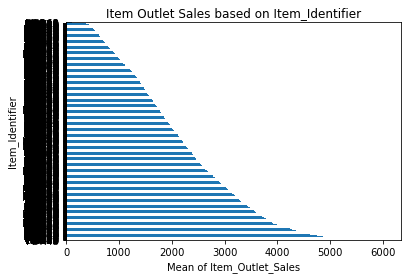

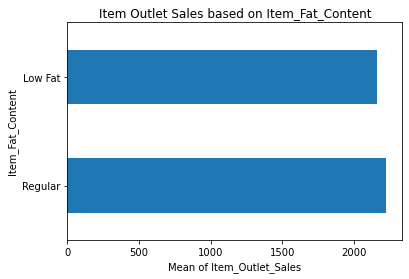

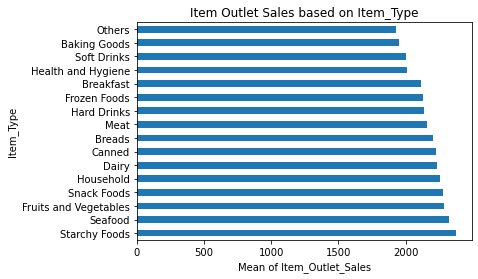

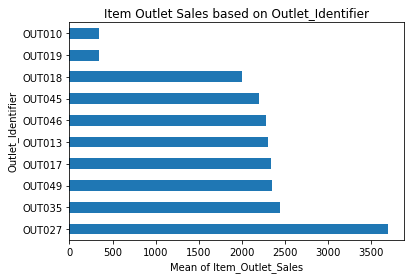

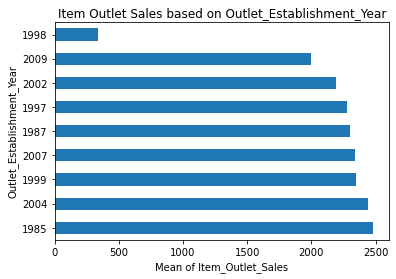

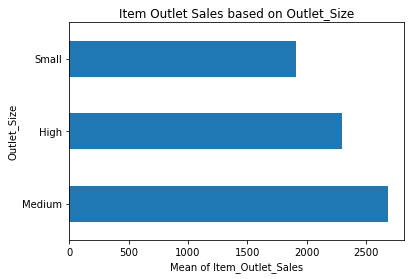

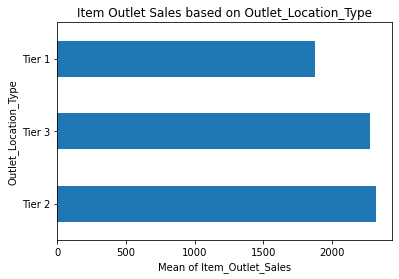

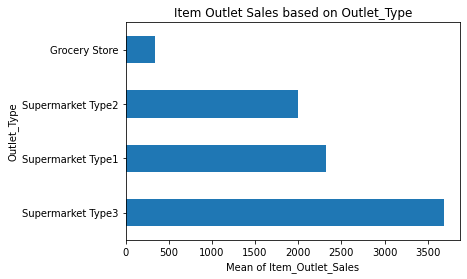

In [13]:
# categorical variable comparison
for x in cat_cols:
    supermarket_df.groupby(x)['Item_Outlet_Sales'].mean().sort_values(ascending=False).plot(kind='barh')
    plt.title(f'Item Outlet Sales based on {x}')
    plt.xlabel('Mean of Item_Outlet_Sales')
    plt.show()


#### Top 5 products with highest sales

In [14]:
identifier_sales=supermarket_df.groupby('Item_Identifier')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
identifier_sales.head()

Item_Identifier
FDR45    6035.310550
NCL42    5962.017067
FDU55    5922.457450
FDZ50    5512.824000
DRK23    5464.886400
Name: Item_Outlet_Sales, dtype: float64

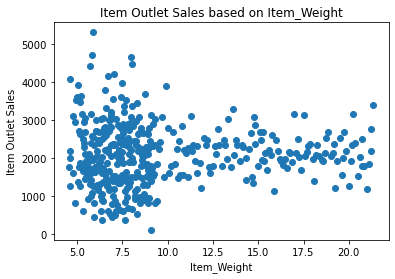

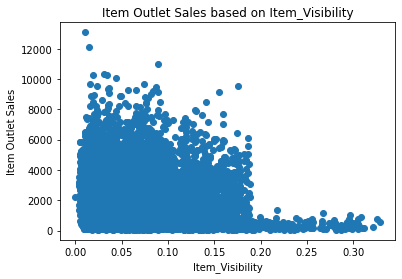

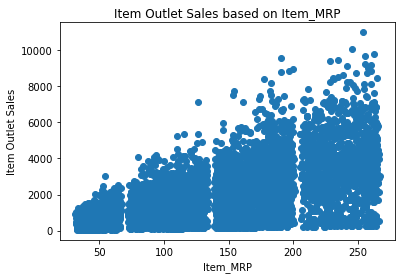

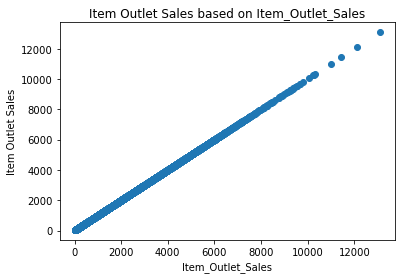

In [15]:
# Numerical variable comparison
# I compared the variables to the average sale instead of the total sales to get more accurate results
for x in num_cols:
    group_mean = supermarket_df.groupby(x)['Item_Outlet_Sales'].mean()
    plt.scatter(group_mean.index, group_mean.values)
    plt.title(f'Item Outlet Sales based on {x}')
    plt.xlabel(x)
    plt.ylabel('Item Outlet Sales')
    plt.show()

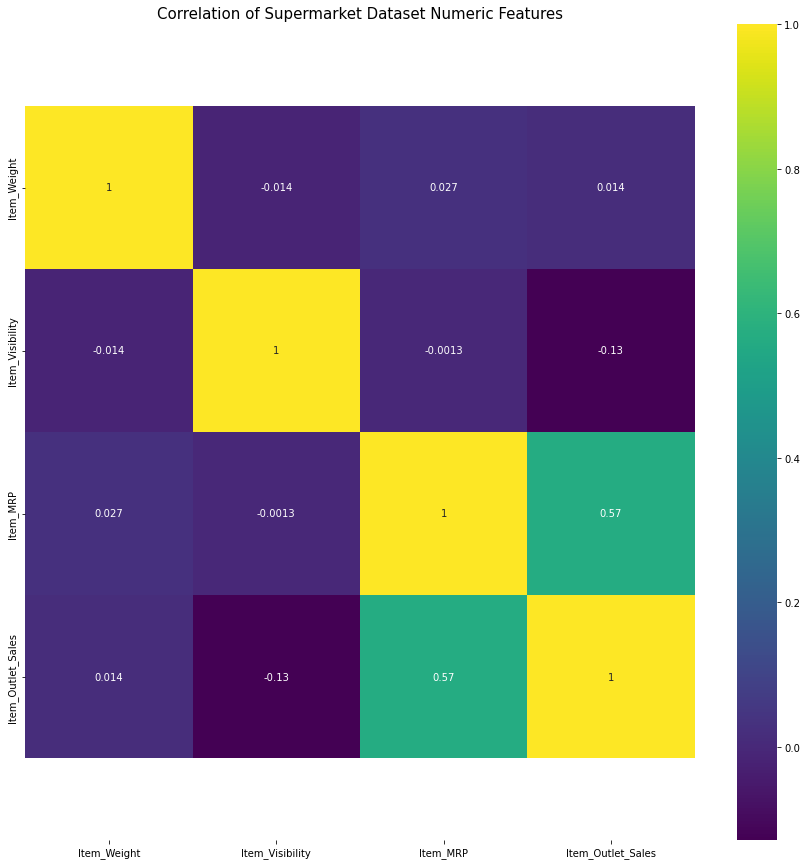

In [16]:
# Heatmap for numerical variables
# Create new dataframe with only numeric variables
numeric_df = supermarket_df.select_dtypes(include=['number'])
# Creating heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of Supermarket Dataset Numeric Features', size=15)
ax = sns.heatmap(numeric_df.astype(float).corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [17]:
# As seen from the scatterplot and the heatmap, there is very little corelation between item_weight and 
# Item_Outlet_Sales. In real life too, the weight of the item does not have an effect on the price of the item
# Hence, I decided to remove the Item_Weight variable
supermarket_df=supermarket_df.drop('Item_Weight',axis=1)

#### 1.5 Dealing with Outliers in target variable <a id="part1.5"></a>

In [18]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30,kde=True)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

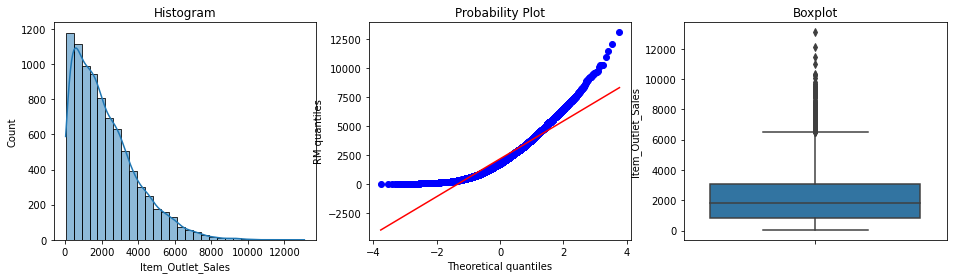

In [19]:
diagnostic_plots(supermarket_df, 'Item_Outlet_Sales')

In [20]:
supermarket_df.shape

(8523, 11)

In [21]:
def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

upper_boundary, lower_boundary = find_boundaries(supermarket_df, 'Item_Outlet_Sales', 1.5)

outliers = np.where(supermarket_df['Item_Outlet_Sales'] > upper_boundary, True,
                    np.where(supermarket_df['Item_Outlet_Sales'] < lower_boundary, True, False))

outliers_df = supermarket_df.loc[outliers, 'Item_Outlet_Sales']
pd.set_option('display.max_rows', None)
outliers_df.sort_values(ascending=False).head()

7188    13086.9648
5223    12117.5600
1450    11445.1020
4349    10993.6896
6541    10306.5840
Name: Item_Outlet_Sales, dtype: float64

In [22]:
outliers.sum()

186

Trimming 

In [23]:
# upper_limit, lower_limit = find_boundaries(supermarket_df, 'Item_Outlet_Sales', 1.5)
# upper_limit, lower_limit

In [24]:
# outliers_Sales = np.where(supermarket_df['Item_Outlet_Sales'] > upper_limit, True,
#                        np.where(supermarket_df['Item_Outlet_Sales'] < lower_limit, True, False))

In [25]:
# supermarket_df = supermarket_df.loc[~outliers_Sales ]

Winsorisation

In [26]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [27]:
supermarket_df['Item_Outlet_Sales']= winsorise(supermarket_df, 'Item_Outlet_Sales', supermarket_df['Item_Outlet_Sales'].quantile(0.95), supermarket_df['Item_Outlet_Sales'].quantile(0.05))

Capping

In [28]:
def find_skewed_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [29]:
# Sales_upper_limit, Sales_lower_limit = find_skewed_boundaries(supermarket_df, 'Item_Outlet_Sales', 1.5)
# Sales_upper_limit, Sales_lower_limit

In [30]:
# supermarket_df['Item_Outlet_Sales']= np.where(supermarket_df['Item_Outlet_Sales'] > Sales_upper_limit, Sales_upper_limit,
#                        np.where(supermarket_df['Item_Outlet_Sales'] < Sales_lower_limit, Sales_lower_limit, supermarket_df['Item_Outlet_Sales']))

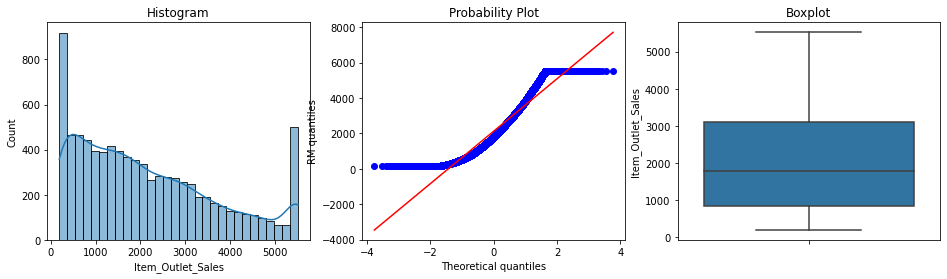

In [31]:
diagnostic_plots(supermarket_df, 'Item_Outlet_Sales')

In [32]:
supermarket_df.shape

(8523, 11)

### Step 2: Train and Test Split <a id="part2"></a>

In [33]:
# Split the data into train data (70%) and test data (30%)
X_train, X_test, y_train, y_test = train_test_split(
    supermarket_df.drop('Item_Outlet_Sales', axis=1), supermarket_df['Item_Outlet_Sales'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((5966, 10), (2557, 10))

### Step 3: Missing Value Imputation <a id="part3"></a>

In [34]:
# find the percentage of missing data within the variables
X_train.isnull().mean()

Item_Identifier              0.000000
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.281763
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
dtype: float64

In [35]:
# As seen from above, there is one variable with missing values and it is 'Outlet_Size'

# Outlet_Size (Categorical var)
# I will be replacing the missing values in this variable with the frequent value
features_cat_frequent = ['Outlet_Size']

In [36]:
# we instantiate each imputer within a pipeline

pipe = Pipeline(steps=[
    ('imp_cat_frequent', mdi.CategoricalImputer(variables = features_cat_frequent, imputation_method='frequent')),
])

In [37]:
# now we fit the preprocessor
pipe.fit(X_train)

Pipeline(steps=[('imp_cat_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Outlet_Size']))])

In [38]:
# and now we impute the data
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [39]:
X_train.isnull().mean()

Item_Identifier              0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

In [40]:
X_test.isnull().mean()

Item_Identifier              0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
dtype: float64

In [41]:
X_train.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
88,FDN33,Regular,0.123116,Snack Foods,95.6436,OUT046,1997,Small,Tier 1,Supermarket Type1
6813,FDY31,Low Fat,0.043809,Fruits and Vegetables,146.8418,OUT017,2007,Medium,Tier 2,Supermarket Type1
4046,NCH54,Low Fat,0.072317,Household,160.7920,OUT027,1985,Medium,Tier 3,Supermarket Type3
8194,FDY15,Regular,0.299098,Dairy,157.8630,OUT019,1985,Small,Tier 1,Grocery Store
8293,NCT30,Low Fat,0.080278,Household,47.2718,OUT035,2004,Small,Tier 2,Supermarket Type1


### Step 4: Categorical Data Encoding <a id="part4"></a>

In [42]:
X_train=X_train.drop('Item_Identifier',axis=1)
X_test=X_test.drop('Item_Identifier',axis=1)

In [43]:
cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [44]:
# # Ordinal encoding
# cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
# ordinal_enc = OrdinalEncoder(encoding_method='arbitrary',variables=None)
# ordinal_enc.fit(X_train)
# X_train = ordinal_enc.transform(X_train)
# X_test = ordinal_enc.transform(X_test)

In [45]:
# # Count encoding
# count_enc = CountFrequencyEncoder(encoding_method='count',variables=None)
# count_enc.fit(X_train)
# X_train = count_enc.transform(X_train)
# X_test = count_enc.transform(X_test)

In [46]:
# # Frequency encoding
# count_enc = CountFrequencyEncoder(encoding_method='frequency',variables=None)
# count_enc.fit(X_train)
# X_train = count_enc.transform(X_train)
# X_test = count_enc.transform(X_test)

In [47]:
# # Ordered Ordinal encoding
# cat_cols = [c for c in X_train.columns if X_train[c].dtypes=='O']
# ordinal_enc = OrdinalEncoder(encoding_method='ordered',variables=None)
# ordinal_enc.fit(X_train,y_train)
# X_train = ordinal_enc.transform(X_train)
# X_test = ordinal_enc.transform(X_test)

In [48]:
# Target Mean encoding
mean_enc = MeanEncoder(variables=None)
mean_enc.fit(X_train,y_train)
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

In [49]:
# # One hot encoding
# ohe_enc = OneHotEncoder(top_categories=None)
# ohe_enc.fit(X_train)
# X_train = ohe_enc.transform(X_train)
# X_test = ohe_enc.transform(X_test)

In [50]:
X_train.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
88,2158.780675,0.123116,2199.986976,95.6436,2233.072759,2233.072759,1869.349995,1855.782278,2269.872074
6813,2088.999464,0.043809,2146.675125,146.8418,2276.570547,2276.570547,2204.552805,2278.994968,2269.872074
4046,2088.999464,0.072317,2210.084510,160.7920,3384.052824,2281.553789,2204.552805,2166.367877,3384.052824
8194,2158.780675,0.299098,2090.238983,157.8630,366.220345,2281.553789,1869.349995,1855.782278,363.546949
8293,2088.999464,0.080278,2210.084510,47.2718,2365.186226,2365.186226,1869.349995,2278.994968,2269.872074


In [51]:
X_test.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4931,2088.999464,0.089960,1983.657747,159.5604,2196.260642,2196.260642,2204.552805,2278.994968,2269.872074
4148,2088.999464,0.009535,2199.986976,64.5510,3384.052824,2281.553789,2204.552805,2166.367877,3384.052824
7423,2088.999464,0.017742,1983.657747,129.6626,2276.570547,2276.570547,2204.552805,2278.994968,2269.872074
4836,2088.999464,0.000000,2095.731164,143.1154,2276.570547,2276.570547,2204.552805,2278.994968,2269.872074
944,2088.999464,0.049264,2199.986976,195.0478,2239.891258,2239.891258,2239.891258,2166.367877,2269.872074


In [52]:
# Looking at MAE score after encoding
lm_reg = linear_model.LinearRegression()
lm_reg.fit(X_train, y_train)

# Evaluate the Linear Regression Model using Mean Absolute Error (MAE)
# The lower MAE, the better model performance
print('train_mae:', mean_absolute_error(y_train, lm_reg.predict(X_train)), 
      '\n test_mae:', mean_absolute_error(y_test, lm_reg.predict(X_test)))

train_mae: 765.6744287901162 
 test_mae: 802.1131913210696


### Step 5: Data Preprocessing <a id="part5"></a>

Now I will be identifying the outliers and looking at the distribution of each numerical variable


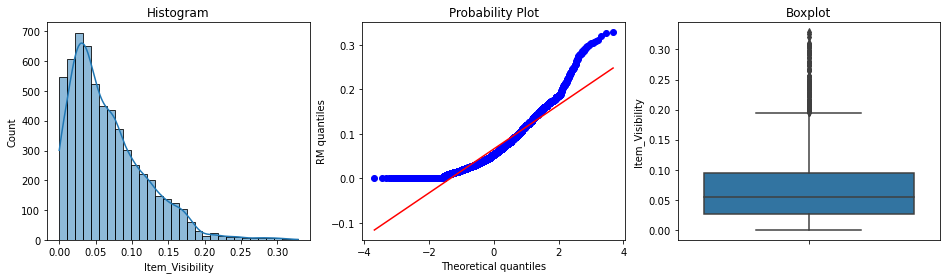

In [53]:
# Item_Visibility
diagnostic_plots(X_train, 'Item_Visibility')

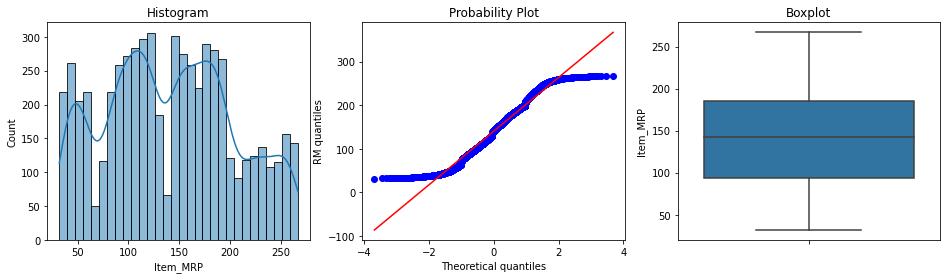

In [54]:
# Item_MRP
diagnostic_plots(X_train, 'Item_MRP')

### Transforming numerical variables

In [55]:
# As seen from the histograms, Item_MRP and Item_Visibility do not have normal distributions so there is 
# a need to transform these variables. 
# As seen from the box plots of the numerical variables above, only the Item_Visibility has outliers.

### 5.1 Transforming Item_Visibility <a id="part5.1"></a>

In [56]:
# # # Transforming Item_Visibility with logarithmic transformation (Cannot use, gives zero error)
# lt = LogTransformer(variables=['Item_Visibility'])

# # fit transformer to the entire dataframe
# lt.fit(X_train)
# # transform the indicated variables within our data set
# X_train = lt.transform(X_train)
# X_test = lt.transform(X_test)

# diagnostic_plots(X_train, 'Item_Visibility')

In [57]:
# # # Transforming Item_Visibility with reciprocal transformation (Cannot use, gives zero error)
# rt = ReciprocalTransformer(variables = ['Item_Visibility'])

# # # fit transformer to the entire dataframe
# rt.fit(X_train)
# # # transform the indicated variables within our data set
# X_train = rt.transform(X_train)
# X_test = rt.transform(X_test)

# diagnostic_plots(X_train, 'Item_Visibility')

In [58]:
# # Transforming Item_Visibility with power transformation 
# # initialize the transformer
# et = PowerTransformer(variables = ['Item_Visibility'],exp=0.5)

# # fit transformer to the entire dataframe
# et.fit(X_train)
# # transform the indicated variables within our data set
# X_train = et.transform(X_train)
# X_test = et.transform(X_test)

# diagnostic_plots(X_train, 'Item_Visibility')

In [59]:
# # # Transforming Item_Visibility with box-cox transformation (Gives error because data is not positive)
# bct = BoxCoxTransformer(variables = ['Item_Visibility'])

# # fit transformer to the entire dataframe
# bct.fit(X_train)
# # transform the indicated variables within our data set
# X_train = bct.transform(X_train)
# X_test = bct.transform(X_test)

# diagnostic_plots(X_train, 'Item_Visibility')

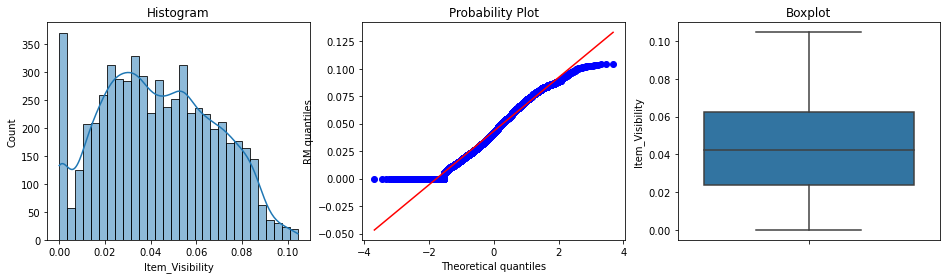

In [60]:
# Transforming Item_Visibility with yeo-johnson transformation 
# initialize the transformer
yjt = YeoJohnsonTransformer(variables = ['Item_Visibility'])

# fit transformer to the entire dataframe
yjt.fit(X_train)
# transform the indicated variables within our data set
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

diagnostic_plots(X_train, 'Item_Visibility')

In [61]:
# Only power and yeo johnson transformation can be used on Item_Visibility

### 5.2 Transforming Item_MRP variable <a id="part5.2"></a>

In [62]:
# # # Transforming Item_MRP with logarithmic transformation
# lt = LogTransformer(variables=['Item_MRP'])

# # fit transformer to the entire dataframe
# lt.fit(X_train)
# # transform the indicated variables within our data set
# X_train = lt.transform(X_train)
# X_test = lt.transform(X_test)

# diagnostic_plots(X_train, 'Item_MRP')

In [63]:
# # # Transforming Item_MRP with reciprocal transformation
# rt = ReciprocalTransformer(variables = ['Item_MRP'])

# # # fit transformer to the entire dataframe
# rt.fit(X_train)
# # # transform the indicated variables within our data set
# X_train = rt.transform(X_train)
# X_test = rt.transform(X_test)

# diagnostic_plots(X_train, 'Item_MRP')

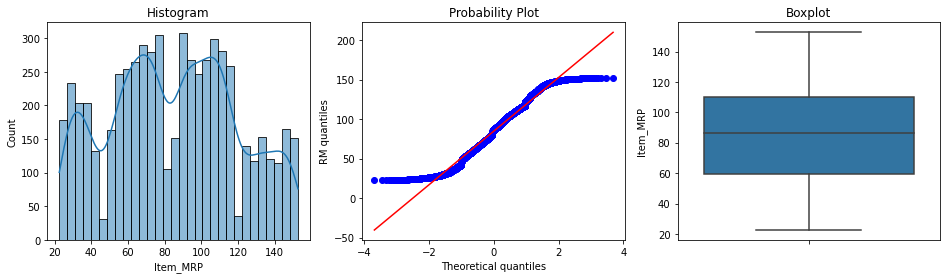

In [64]:
# Transforming Item_MRP with power transformation 
# initialize the transformer
et = PowerTransformer(variables = ['Item_MRP'],exp=0.9)

# fit transformer to the entire dataframe
et.fit(X_train)
# transform the indicated variables within our data set
X_train = et.transform(X_train)
X_test = et.transform(X_test)

diagnostic_plots(X_train, 'Item_MRP')

In [65]:
# # # Transforming Item_MRP with box-cox transformation 
# bct = BoxCoxTransformer(variables = ['Item_MRP'])

# # fit transformer to the entire dataframe
# bct.fit(X_train)
# # transform the indicated variables within our data set
# X_train = bct.transform(X_train)
# X_test = bct.transform(X_test)

# diagnostic_plots(X_train, 'Item_MRP')

In [66]:
# # Transforming Item_MRP with yeo-johnson transformation 
# # initialize the transformer
# yjt = YeoJohnsonTransformer(variables = ['Item_MRP'])

# # fit transformer to the entire dataframe
# yjt.fit(X_train)
# # transform the indicated variables within our data set
# X_train = yjt.transform(X_train)
# X_test = yjt.transform(X_test)

# diagnostic_plots(X_train, 'Item_MRP')

### Step 6: Variable Discretization /Binning <a id="part6"></a>

Text(0, 0.5, 'No.of observations per bin')

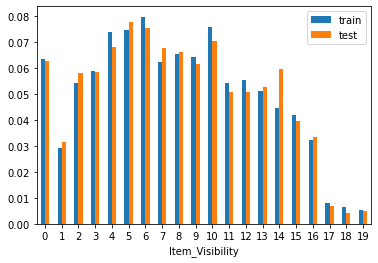

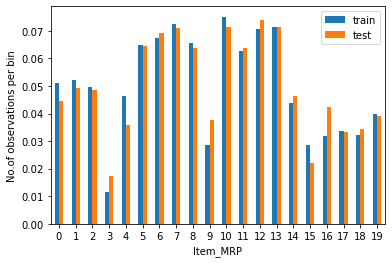

In [67]:
# Equal Width Discretization
bin_col = ['Item_Visibility','Item_MRP']

for x in bin_col:
    
    disc = EqualWidthDiscretiser(bins=20,variables = [x])
    disc.fit(X_train)

    train_t = disc.transform(X_train)
    test_t = disc.transform(X_test)

    t1 = train_t.groupby([x])[x].count() / len(train_t)
    t2 = test_t.groupby([x])[x].count() / len(test_t)

    supermarket_tmp = pd.concat([t1,t2], axis=1)
    supermarket_tmp.columns = ['train','test']
    supermarket_tmp.plot.bar()
    plt.xticks(rotation=0)
    
plt.ylabel('No.of observations per bin')

In [68]:
# # Equal Frequency Discretization
# bin_col = ['Item_Visibility','Item_MRP']

# for x in bin_col:
    
#     disc = EqualFrequencyDiscretiser(variables = [x])
#     disc.fit(X_train)

#     train_t = disc.transform(X_train)
#     test_t = disc.transform(X_test)

#     t1 = train_t.groupby([x])[x].count() / len(train_t)
#     t2 = test_t.groupby([x])[x].count() / len(test_t)

#     supermarket_tmp = pd.concat([t1,t2], axis=1)
#     supermarket_tmp.columns = ['train','test']
#     supermarket_tmp.plot.bar()
#     plt.xticks(rotation=0)
    
# plt.ylabel('No.of observations per bin')

### Step 7: Feature Engineer <a id="part7"></a>

#### 7.1 Dropped Columns <a id="part7.1"></a>
Dropped Columns : Item_Identifier and Item_Weight

#### 7.2 Scaling <a id="part7.2"></a>

In [69]:
# Standardisation
# set up the scaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaler.mean_

# scaler.scale_


In [70]:
# # Mean Normalisation
# means = X_train.mean(axis=0)
# ranges = X_train.max(axis=0)-X_train.min(axis=0)

# X_train_scaled = (X_train - means)/ranges
# X_test_scaled = (X_test - means)/ranges

In [71]:
# ## MinMax Scaling
# scaler = MinMaxScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler.data_max_

# scaler.min_

# scaler.data_range_

In [72]:
# # Max Absolute Scaling
# scaler = MaxAbsScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler.max_abs_

In [73]:
# # Robust Scaling
# scaler = RobustScaler()

# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# scaler.center_

# scaler.scale_

In [74]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

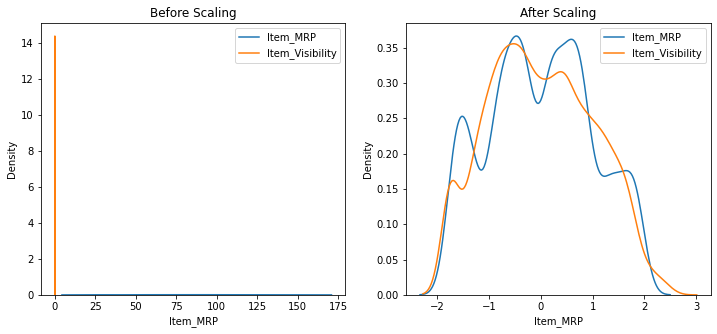

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Item_MRP'], ax=ax1, label ='Item_MRP')
sns.kdeplot(X_train['Item_Visibility'], ax=ax1, label ='Item_Visibility')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Item_MRP'], ax=ax2, label ='Item_MRP')
sns.kdeplot(X_train_scaled['Item_Visibility'], ax=ax2, label ='Item_Visibility')
ax2.legend()
plt.show()

In [76]:
X_train=X_train_scaled
X_test=X_test_scaled

#### 7.3 Polynomial Expansion <a id="part7.3"></a>

Relationship between numerical variables in X_train and X_test

In [77]:
X_num_col = ['Item_Visibility','Item_MRP']

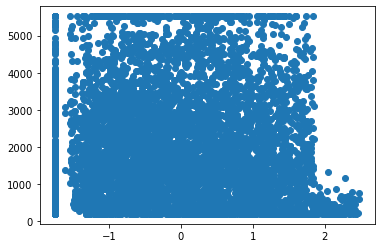

In [78]:
plt.scatter(X_train['Item_Visibility'], y_train)

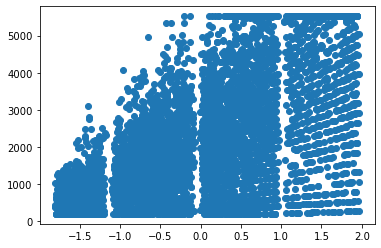

In [79]:
plt.scatter(X_train['Item_MRP'], y_train)

The relationship of the numerical variables are not linear which is why I decided to use polynomial expansion to make the relationship more linear.

In [80]:
# Polynomial Expansion
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

poly.fit(X_train)

X_train = poly.transform(X_train)
X_test = poly.transform(X_test)

In [81]:
X_test = pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,-0.737832,0.697119,-1.273070,0.326867,0.107980,0.174396,0.591898,0.971772,0.204481,0.544396,...,0.030414,0.103225,0.169473,0.035661,0.350343,0.575190,0.121032,0.944340,0.198709,0.041813
1,-0.737832,-1.381471,0.846397,-1.227055,1.659550,0.354340,0.591898,0.310047,1.662354,0.544396,...,0.125557,0.209733,0.109862,0.589039,0.350343,0.183516,0.983944,0.096129,0.515408,2.763420
2,-0.737832,-1.090339,-1.273070,-0.148238,0.212886,0.343827,0.591898,0.971772,0.204481,0.544396,...,0.118217,0.203511,0.334121,0.070306,0.350343,0.575190,0.121032,0.944340,0.198709,0.041813
3,-0.737832,-1.750068,-0.175041,0.066762,0.212886,0.343827,0.591898,0.971772,0.204481,0.544396,...,0.118217,0.203511,0.334121,0.070306,0.350343,0.575190,0.121032,0.944340,0.198709,0.041813
4,-0.737832,-0.161830,0.846397,0.879412,0.164973,0.266444,0.821865,0.310047,0.204481,0.544396,...,0.070992,0.218981,0.082610,0.054483,0.675462,0.254817,0.168056,0.096129,0.063399,0.041813


### Step 8: Linear Regression Modelling <a id="part8"></a>

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [82]:
X_train_student_final_premodel_version = X_train
X_test_student_final_premodel_version = X_test 
y_train_student_final_premodel_version = y_train
y_test_student_final_premodel_version = y_test

In [83]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [84]:
X_train_final = X_train_student_final_premodel_version
X_test_final = X_test_student_final_premodel_version

y_train_final = y_train_student_final_premodel_version
y_test_final = y_test_student_final_premodel_version

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [86]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 872820.0724257048 
 test_mse: 960480.2198951116
train_r-sq: 0.624177434804792 
 test_r-sq: 0.6132861566873662


### 9 Report <a id="part9"></a>

#### 9.1 Introduction/Problem Understanding<a id="part9.1"></a>

In this report, I will be going through the data-wrangling process of a dataset based on supermarkets. The supermarket.csv file which I based the data wrangling process on, has data that has been collected at various supermarket outlets and stores in different cities. My aim for this data-wrangling process is to create a model using Python that will be able to predict the sales of each product at a particular outlet. My model will help the supermarket management team to understand the effect of the properties of products and outlets which play a key role in increasing sales.

There will be several sections in this report and in each section, I will be highlighting the different steps I took during the data wrangling process. After this section, I will be going through the dataset in greater detail. I will be explaining the values of each variable and I will also be touching on the relationship between the different variables in the dataset. 
Next, I will be discussing the data cleansing process. Since the model cannot run with missing values, I had to replace missing data so I will be sharing the techniques I had used to replace the missing data. 

After going through the cleansing of data, I will be moving on to the variable transformation section. In this section, I will be sharing the different transformation techniques of categorical variables and numerical variables. The transformation techniques of categorical variables and numerical variables are totally different from each other and the purpose of transforming categorical variables and numerical variables are totally different too. As part of the numerical transformation part of this section, I will also be sharing the binning process for the numerical variables.

After the data transformation section, I will be moving on to the feature engineering section. In this section, I will be sharing the variables that I had dropped during the data wrangling process, the scaling of the existing variables, and the purpose of scaling feature scaling, and lastly, in this section, I will be sharing the new features that were created.
Then, I will be sharing about how the linear regression model was built and I will be sharing about the multiple tests I ran to compare the accuracy of the model. I had to test out different combinations and configurations when testing the regression model to get the best score possible. The higher the score, the more accurate the model will be.

At the end of the report, I will be summarizing my findings such as the methods I used to obtain my most accurate result. Additionally, I will be providing my input on the possible improvements that can be made to increase the accuracy of the model.


#### 9.2 Data Exploration<a id="part9.2"></a>

The dataset contains 12 variables. 7 of these variables are categorical variables and the rest of the 5 variables are numerical variables. Out of the numerical variables, 4 of them are float64 data type while the remaining one is int64 data type.

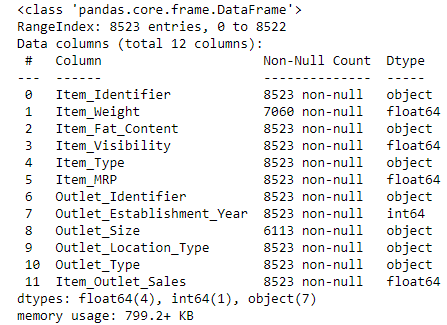

##### 9.2.1 Relationship of categorical variables with target variable <a id="part9.2.1"></a>
I used the mean of the target variable when comparing it with the categorical variables. To visualize the comparison, I used bar charts.However before that, I cleaned the data of 'Outlet_establishment_Year' and 'Item_Fat_Content' and I will be sharing at the data cleansing section.

__Item_Identifier__

I decided to investigate the relationship between ‘Item_Identifier’ and the target variable as different products bring in different amounts of sales. I could not show all the products as there are over 1500 unique products so the top 5 items with the most sales are as follows. 
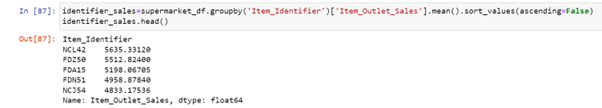

__Item_Fat_Content__

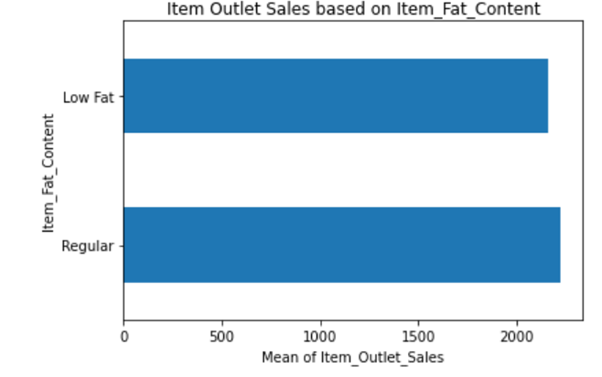

Regular-fat items brought in more sales than low-fat items by a tiny margin. I thought that low fat items will make more sales than regular fat ones as these days many people are mindful about their health so more people choose low fat items over the ones with more fat percentage.

__Item_Type__

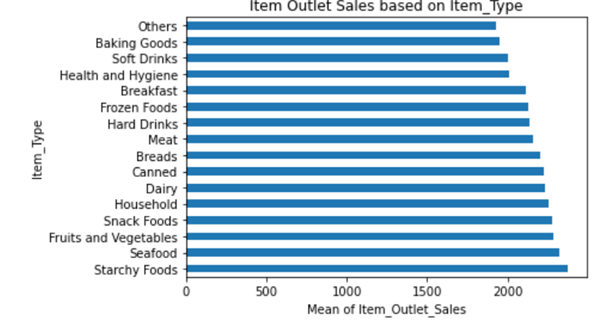

We can see that starchy foods bring in the most amount of sales potentially due to the fact that they are popular as they are vital to the human diet. The RMP of starchy foods can be increased to bring in more profit.

__Outlet_Size__
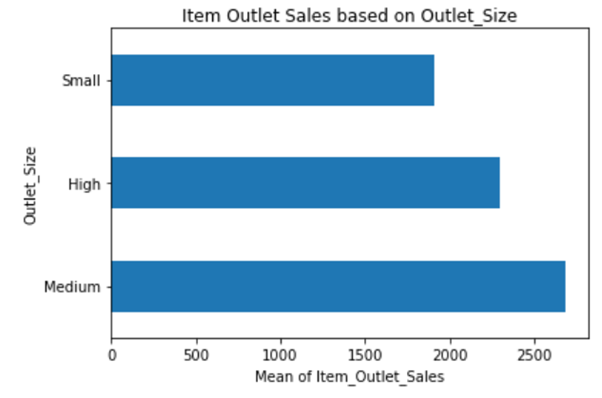

I wanted to determine if the size of the store had any effect on the mean sales. I thought that bigger outlets would generate more sales as they can house more products. However, after comparing, I found that I was wrong as the medium-sized outlets generated the most sales.

__Outlet_Location_Type__
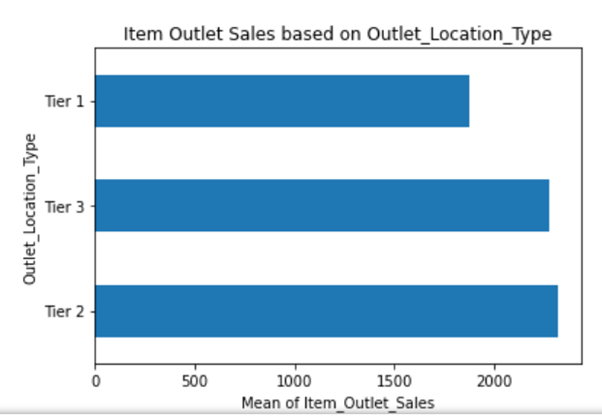

This information will help the management team decide which type of location to open more stores in. From the bar chart, its better to open stores in tier 2 and 3 locations.

__Outlet_Type__
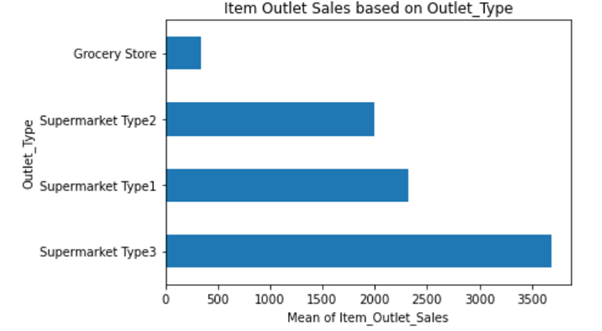

This information will help the marketing team decide which type of stores to build in the future. From the bar chart, its better to open supermarkets rather than grocery stores.

##### 9.2.2 Relationship of numerical variables with target variable <a id="part9.2.2"></a>

To visualize the comparison and the relationship between the numerical variables and the target variable, I used scatterplots and also made a heatmap to see the correlation between the numerical variables as the target variable is a numerical variable too.

__Item_Weight__

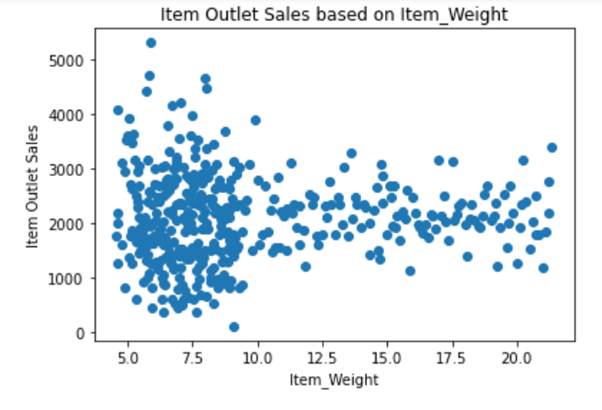

I was not expecting a strong relationship between the variables as in reality, the weight does not affect sales of items. The scatterplot supports my theory as it does not show any definitive relationship.

__Item_Visibility__
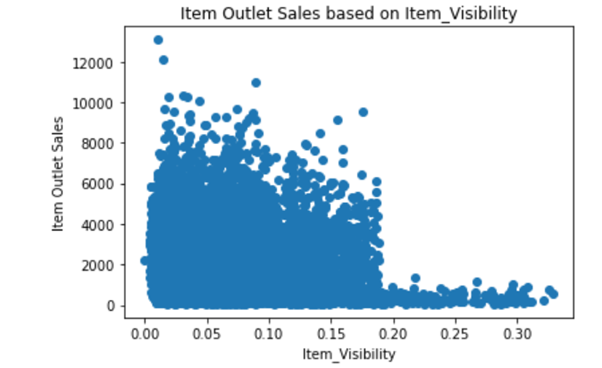

I was expecting a strong relationship between ‘Item_Visibility’ and the sales as I thought that products with more display area will rake in more sales. Basically my hypothesis was that as item visibility increases, the sales will also increase. However, it was the opposite as there is a decreasing trend in sales as item visibility increases which was interesting.


__Item_MRP__
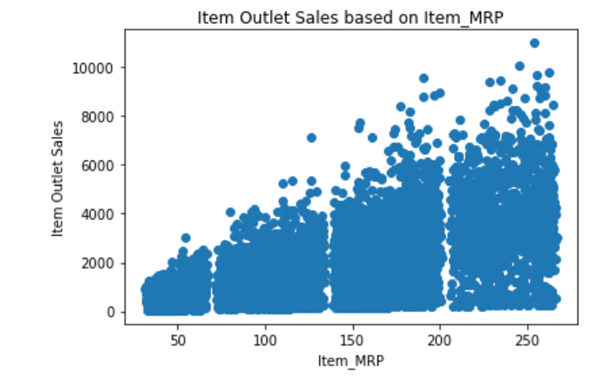

We can see an increasing trend when comparing item MRP and sales which is expected as when the price of the item increases, the sales dollar amount of product should be higher if enough products are sold.

__Correlation__
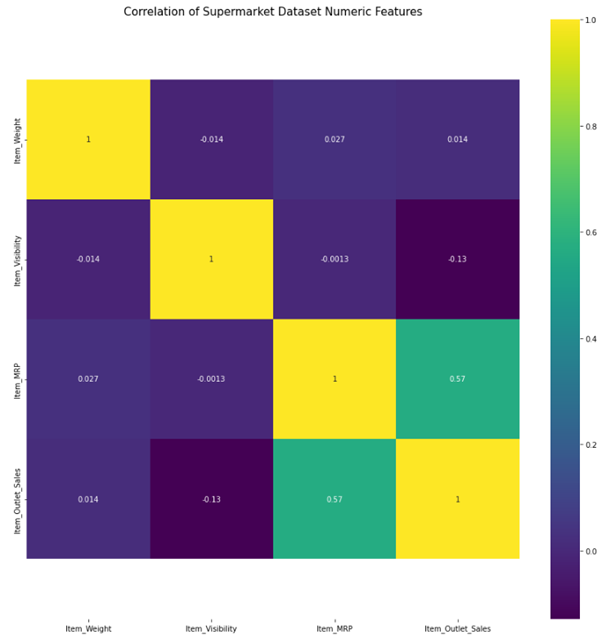

The heatmap shows the correlation of all numerical variables but we only focus on the last row. The lower the score, the less correlation between the variables and vice versa. Item_Weight has the lowest correlation while Item_MRP has the highest correlation with the target variable. I decided to drop Item_Weight here due to the low correlation.


#### 9.3 Data Cleansing<a id="part9.3"></a>


##### 9.3.1 Standardizing values and changing data type<a id="part9.3.1"></a>

During the data exploration process, I found that there were 5 categories in ‘Item_Fat_Content’ but some of the values were in different forms. 
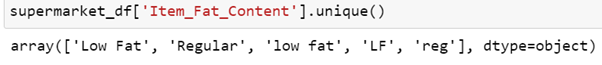

‘LF’ is the shortform of ‘Low Fat’. ‘low fat’ is also the same as ‘Low Fat’, but since it has different casing, python treats it as a different category. Hence, I had to replace the values of ‘LF’ and ‘low fat’ with ‘Low Fat’ and ‘reg’ with ‘Regular’ so that there will only be 2 unique categories left.

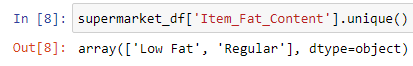

At first the data type of 'Outlet_Establishment_Year' was int64 data type but I thought year data was more categorical in nature in this context. Hence, I converted it to categorical data type.

__Before:__
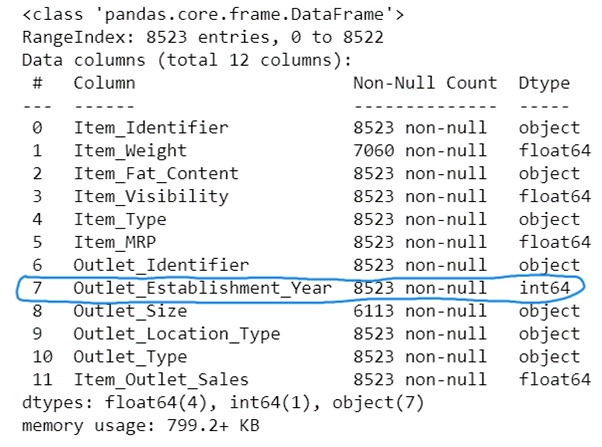

__After:__
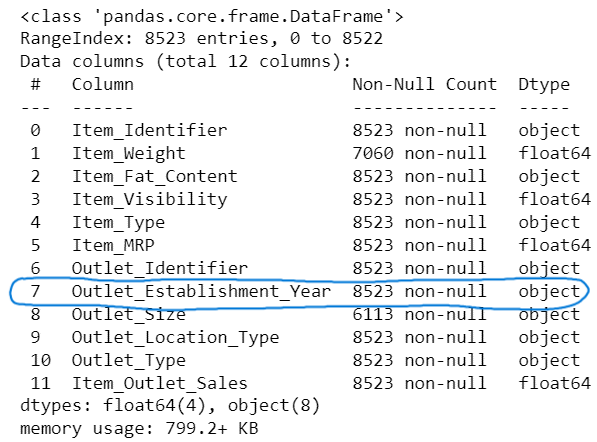

##### 9.3.2 Missing Data<a id="part9.3.2"></a>

I conducted the missing value imputation after conducting Train and Test split as I wanted to make use of pipelines to conduct missing data imputation.  First I found if any of my existing variables had any null values. 
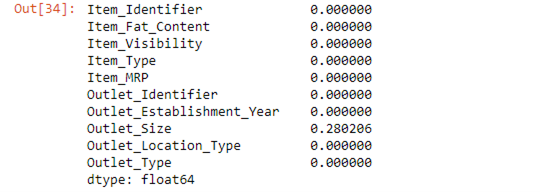
Only the Outlet_Size variable had missing data with 28% of the data missing and since it was a categorical variable, I decided to use a feature-engine pipeline to impute the missing data with the most frequently appearing value. 

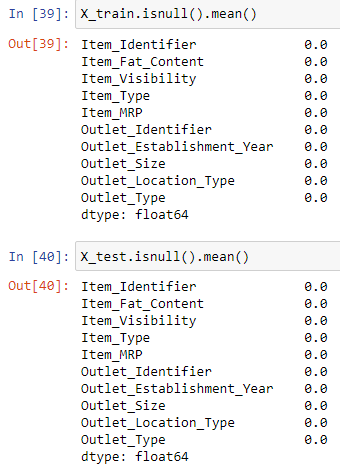

##### 9.3.3 Dealing of Outliers in Target Variable<a id="part9.3.3"></a>

An outlier is an extreme data point that is significantly different from other data points in the variable. Outliers can skew the data distribution which can cause the model to perform poorly.  While conducting my research online, I found that dealing with outliers of the target variable can improve the accuracy of the model as there will be less skewness in the data distribution

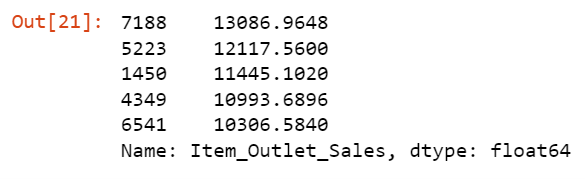

The top 5 outliers are shown above. Outliers can harm the business as the management team will have an inaccurate understanding of the effect of the properties of products and outlets on sales. 

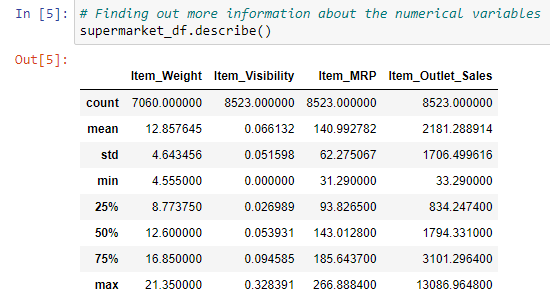

‘Item_Outlet_Sales’ has extreme values as the difference between the maximum and minimum compared to the mean value of ‘Item_Outlet_Sales’ is very large. The difference between 13 000 (max), 2000 (mean) and 30 (min) is very large.

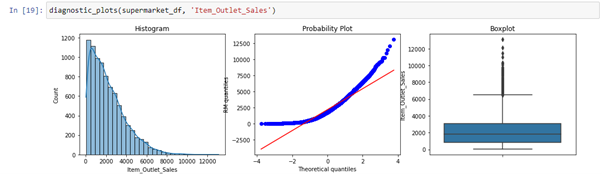

There are 186 outliers present.

__Trimming__
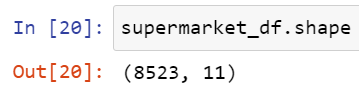

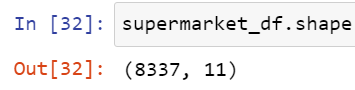
After trimming by quantile, all 186 outliers were removed as 186 rows were removed.

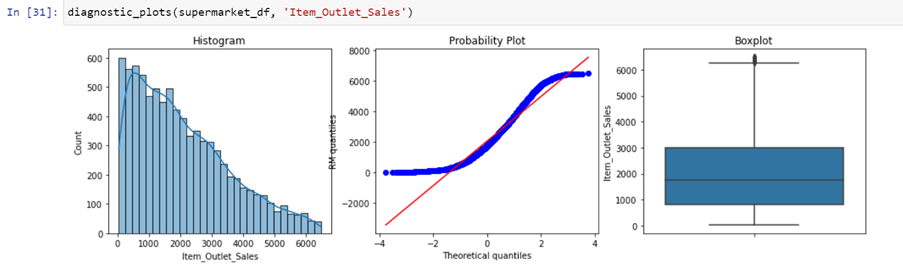

__Winsorization__

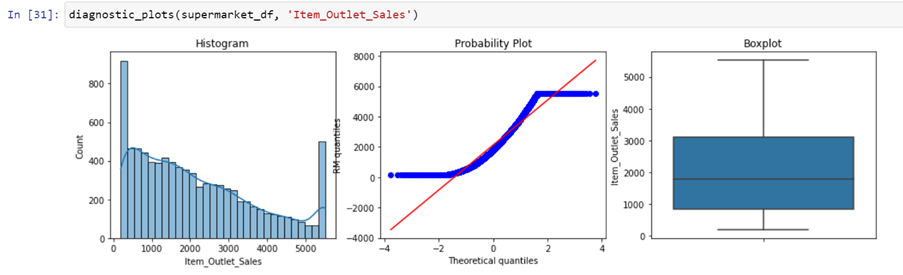

__Capping__
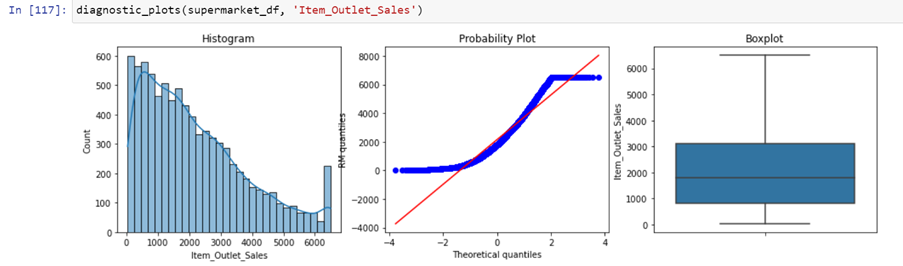

I felt winsorization and capping are better alternatives to trimming as they do not remove any values. More data points allow the model to understand the dataset better and produce more accurate results.

##### 9.3.4 Outliers in other Numerical Variable<a id="part9.3.4"></a>
After dropping variables, I was left with 2 numerical variables other than the target variable and they were ‘Item_Visibility’ and ‘Item_MRP’. 


__Item_Visibility__

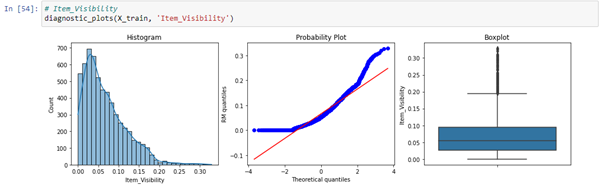

There are many outliers in the ‘Item_Visibility’ and they might lower the accuracy of my model. Furthermore, I was not going to drop this variable as this variable will be very important for the management and logistics teams in deciding the number of products of each type to stock in an outlet.

__Item_MRP__
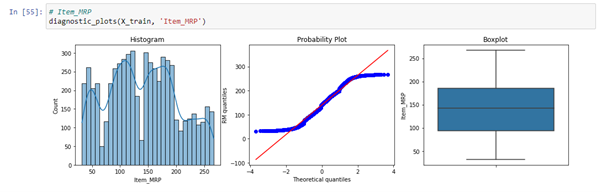

There were no outliers in the ‘Item_MRP’ variable so there was no need to worry too much about this variable.

I was also going to transform these variables later to improve the accuracy of my model and transforming variables can remove outliers so I decided to transform the variables before deciding to deal with the outliers of ‘Item_Visibility’ as I thought transforming might remove all the outliers.


#### 9.4 Data Transformation<a id="part9.4"></a>


##### 9.4.1 Categorical Encoding<a id="part9.4.1"></a>
I will be sharing about the encoding methods that I used most of the time. However before that, I dropped Item_Identifier variable due to its high cardinality.

__Mean encoding__

Mean encoding replaces values with the average target value of their category. For example, 2195.447850 in row 88 is the mean of the sales of the category of Item_Fat_Content in row 88. I think that mean encoding is better than one hot encoding as it retains the original dimensionality of the data.

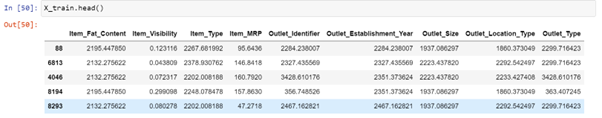

##### 9.4.2 Numerical Variable Transformation<a id="part9.4.2"></a>

Numerical variable transformation can be used to obtain normal distribution and some cases, remove outliers. This is important as some ML models assume input variables to be normally distributed. 

Original variables:

Item_Visibility

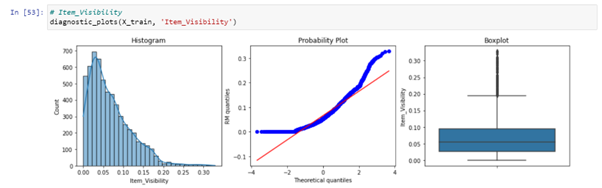

Item_MRP

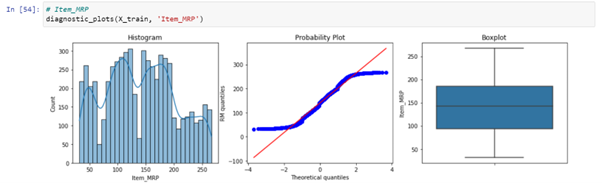

__Logarithmic Transformation__

Logarithmic Transformation replaces values in variables by applying the logarithmic formula to the value. However, the downside of this method is that it cannot work on variables that have zero and negative values.

Formula:

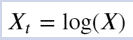

Item_Visibility: Zero error

Item_MRP:
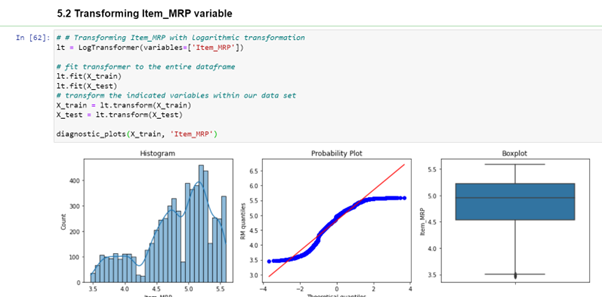

The transformation introduces new outliers below the minimum so it is not a good transformation as it can reduce the model performance. 

__Reciprocal Transformation__

Reciprocal transformation converts the values into fractions and the original value will be the denominator and the numerator will be 1. Cannot be used on 0 values as it will give zero error.

Formula:

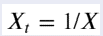

Item_Visibility: Zero Error


Item_MRP:
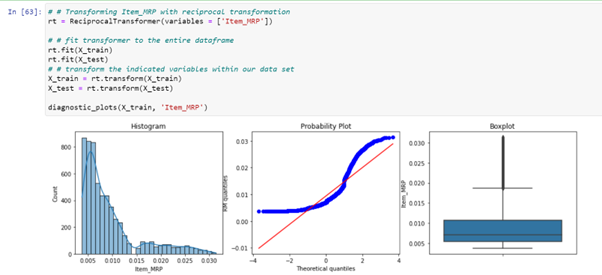

This method is worse than logarithmic as it introduces far more new outliers and makes the distribution more skewed which is the opposite of the results we want.

__Power Transformation__

Power transformation allows you to define the power that is applied to the original values. Power transformation can be used on more variables as integer power can be applied to any number. However, reciprocal powers like square root cannot be applied to negative numbers. 

Formula:

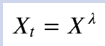



Item_Visibility:
    
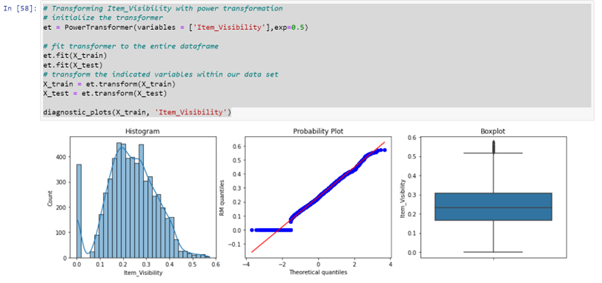

This is a good transformation as it makes the distribution less skewed and reduces the number of outliers from the original variable.

Item_MRP:
    
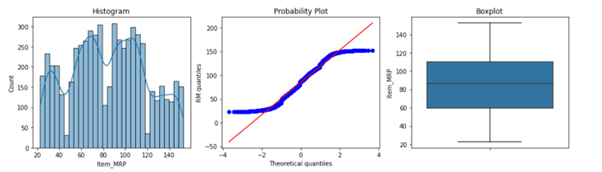

There are no obvious changes from the original variable, but this transformation is better than previous ones as it does not introduce outliers.

__Box-Cox Transformation__

Box-cox can only be performed on variables with positive data values.

Formula:
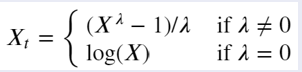

Item_Visibility: Positive data error

Item_MRP: 
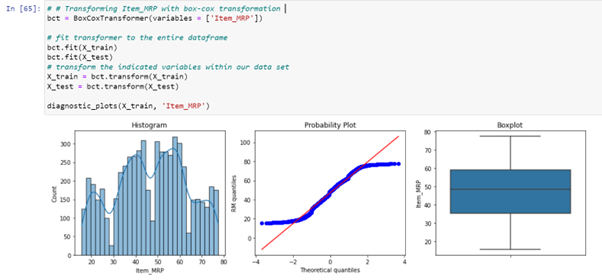

Just like power transformation, there is not much change.
    

__Yeo-Johnson Transformation__

Yeo-Johnson transformation is an extension of box-cox transformation that can be used on any type of value. This makes the Yeo-Johnson transformation the most versatile one.

Formula:

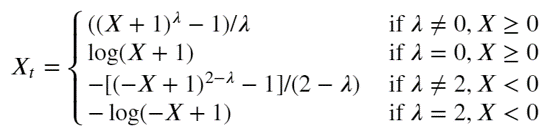



Item_Visibility:
 
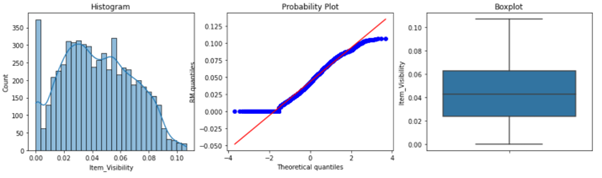

This transformation is best for this variable as it makes the distribution less skewed and removes all outliers from the variable. Hence, I would not have to deal with the outliers of this variable later on.

Item_MRP:
    
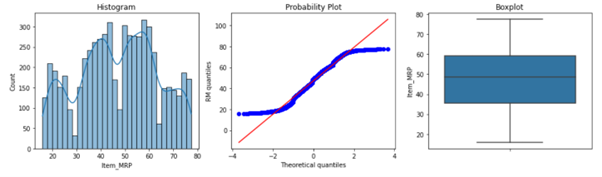

The result of this method is similar to that of box-cox and power. To find the best transformation, we must look at the accuracy of the model using different methods.

From the above Yeo-Johnson transformation seems to be best for Item_Visibility and Reciprocal transformation seems to be the worst for Item_MRP.

##### 9.4.3 Binning<a id="part9.4.3"></a>

Binning transforms continuous variables into discrete variables by creating a set of contiguous intervals. This changes the distribution of skewed variables, minimizes the influence of outliers, and improves the performance of ML models.

__Equal Width Discretization__

Values are sorted into intervals of the same bin width. The number of bins is decided arbitrarily, and width is determined by the range of values and the number of bins to create. 

Formula:
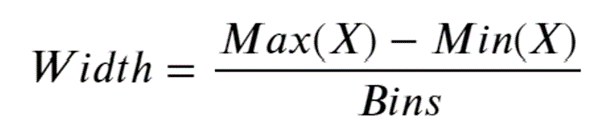

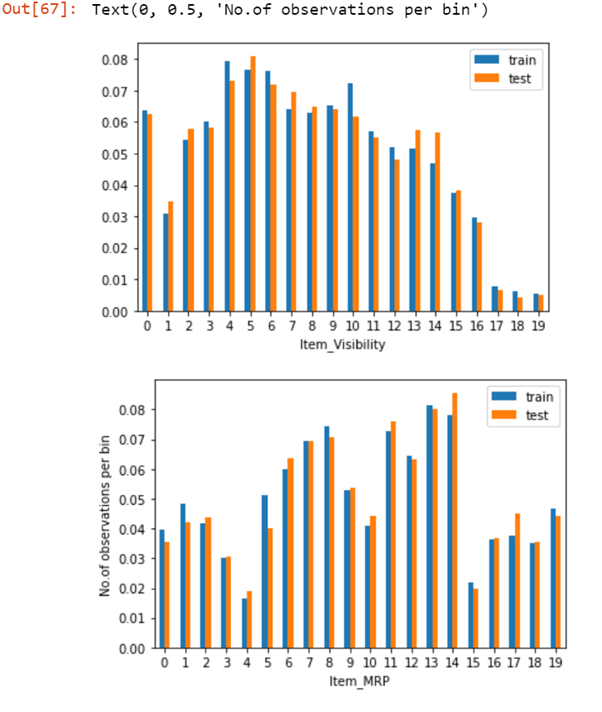

The histogram bars have different heights as the width is the same. With the histograms, the marketing team will be able to understand the trends of the number of products with different item visibilities and MRP.

__Equal Frequency Discretization__

This method divides the values into intervals that carry the same proportion of observations by dividing the continuous variable into quantiles. This method is useful for skewed variables as it spreads the observations over the bins equally.

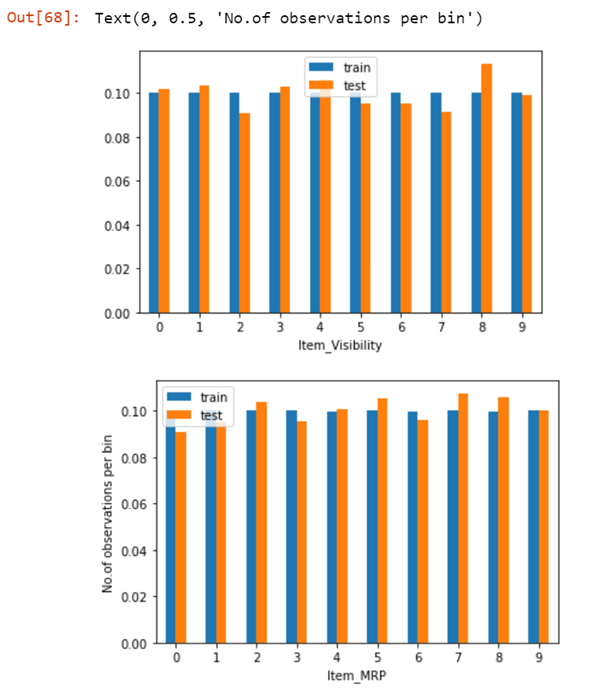

The width of the bins will be different as the heights of the bins are similar and the interval width is determined by quartiles. 

#### 9.5 Feature Engineering<a id="part9.5"></a>





##### 9.5.1 Dropping Variables<a id="part9.5.1"></a>

I dropped ‘Item_Weight’ after comparing the relationship between the variables and the target variable. ‘Item_Weight’ did not have a clear relationship and the correlation between ‘Item_Weight’ and the target variable had a score of 0.014 which is very low. In reality, the weight of products does not affect their sales also.

I dropped the ‘Item_Identifier’ variables before doing the categorical encoding. ‘Item_Identifier’ had a much cardinality than the other categorical variables. 

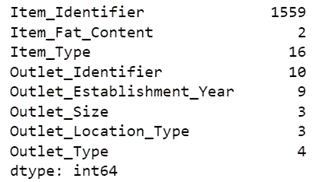

High cardinality can lead to poor model performance, and memory issues when trying to fit the model due to extremely large matrices of values from countless dummy variables.

##### 9.5.2 Scaling<a id="part9.5.2"></a>

Feature scaling allows variables to have similar scales to allow for comparison of feature importance and improves the performance of the model by helping algorithms converge faster. Many algorithms are sensitive to the scale and magnitude of features and features with bigger value ranges can dominate over features with smaller ranges which may produce biased and inaccurate results. By comparing the feature importance, the management team will be able to gain a deeper understanding of the importance of the different properties and outlets.

Standardisation and MinMax normalisation are commonly used in the industry as these 2 methods thoroughly scale the data and are versatile as they can scale many types of data.

__Standardisation__

Standardization is the process of centering the variable at zero and standardizing the variance to 1. In businesses, standardization can ensure reliable data transmission across various systems as it would be easier for systems to exchange data and communicate with one another. Additionally, standardization makes it easier to process, analyze, and store data in a database. Data in the standardized form will make it easier for the marketing team to gain insights on how to increase the sales of the products across the outlets. Standardization is one of the most common scaling techniques used in the industry due to various benefits such as providing insights and improving performance.

To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation: 

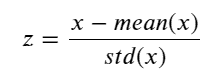


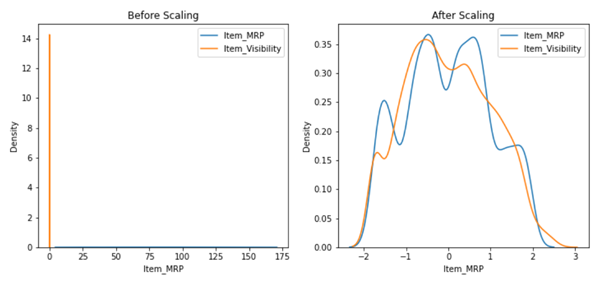

After scaling, the scale has reduced in size significantly and we can see the variables are sharing the same scale. The two ends of each of the KDE plots are at two ends of the scale which signifies a good scaling method. The management team will be able to see the differences in the importance of how item_visibility and item_MRP in affecting sales.

##### 9.5.3 Creating new Features<a id="part9.5.3"></a>

__Item_Visibility:__
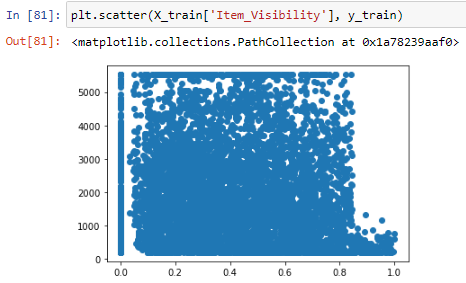


__Item_MRP:__

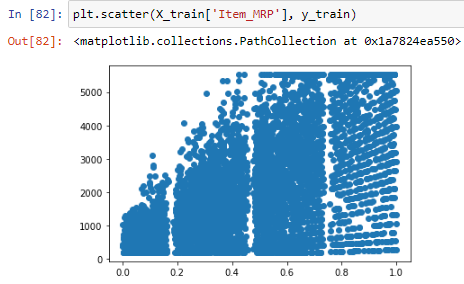

Since the numerical variables do not have a linear relationship, I will use polynomial expansion to make the relationship more linear.

__Polynomial Expansion__

Polynomial expansion is a features computation technique to improve model accuracy by extending the linear model by adding extra variables, obtained by raising each of the original variables to a power defined by the user.  The model is able to capture more complex relationships between the input variables and the output variable, leading to increased accuracy.

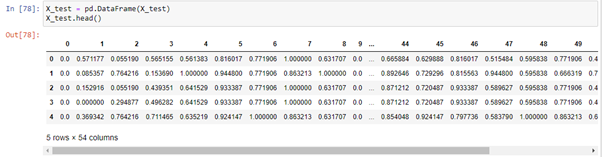

After the polynomial expansion of degree 2, the number of variables increased to 54 as extra variables are added.

#### 9.6 Linear Regression Model<a id="part9.6"></a>

After doing all the data preparation, the linear regression model is now ready to be built. The linear regression model tries to find the best possible linear relationship between the input features and the target variable by fitting a line that minimizes the distance between the data points and the line. I tested the accuracy of the model using two types of scores. 

The first is Mean Square Error (MSE); MSE is the variance of the residuals, the squared differences between prediction and actual observation. Lower values indicate better performance.

The second is R-Square; R-Square represents the percentage of the response variable variation that is explained by a linear model. The closer the score is to 1.0, the better.

For the different tests, I only made changes to the part of the model I was testing. For example, when testing for the best encoding method, I only changed the encoder but kept all other parts of the model the same in the different tests. This is to ensure a fair and accurate comparison. After finding the best method to use for a certain part of the model, I kept that method for the next few tests on other parts of the model. For example, I found mean encoding to be the best, so I used mean encoding for all future tests. 


##### 9.6.1 Encoding Test<a id="part9.6.1"></a>

<u> 1st Test

Encoding used: __One Hot Encoding__

Transformation used on Item_Visibility: Power transformation

Transformation used on Item_MRP: Power Transformation

Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2
    
train_mse: 1085613.0072289815
    
 test_mse: 1226545.4730666238
    
train_r-sq: 0.6196222240927232
    
 test_r-sq: 0.5972044857598688
    


<u> 2nd Test

Encoding used: __Ordinal Encoding__

Transformation used on Item_Visibility: Power transformation

Transformation used on Item_MRP: Power Transformation

Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1152865.9419852989 
    
 test_mse: 1229883.549758986
    
train_r-sq: 0.5960580980408976
    
 test_r-sq: 0.5961082668691731
    



<u> 3rd Test

Encoding used: __Count Encoding__

Transformation used on Item_Visibility: Power transformation

Transformation used on Item_MRP: Power Transformation

Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1131022.1268276006
    
 test_mse: 1202686.165607251
    
train_r-sq: 0.6037117478882067 
    
 test_r-sq: 0.6050398430528059
    


<u> 4th Test

Encoding used: __Frequency Encoding__

Transformation used on Item_Visibility: Power transformation

Transformation used on Item_MRP: Power Transformation

Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1131022.7386826114 
    
 test_mse: 1202686.245117185
    
train_r-sq: 0.6037115335060589
    
 test_r-sq: 0.6050398169418745
    


<u> 5th Test

Encoding used: __Ordered-Ordinal Encoding__

Transformation used on Item_Visibility: Power transformation

Transformation used on Item_MRP: Power Transformation

Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1126993.0569381227 
    
 test_mse: 1204467.8942462204
    
train_r-sq: 0.6051234559585129 
    
 test_r-sq: 0.6044547263008149
    



<u> 6th Test

Encoding used: __Mean Encoding__

Transformation used on Item_Visibility: Power transformation

Transformation used on Item_MRP: Power Transformation

Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1119967.0916057862 
    
 test_mse: 1194724.5049575206
    
train_r-sq: 0.6075852181600707 
    
 test_r-sq: 0.6076544393038488
    


When using the mean encoder gives me the best results while using the ordinal encoder gives me the worst results.

##### 9.6.2 Transformation Test on Item_Visibility<a id="part9.6.2"></a>

<u> 1st Test

Encoding used: Mean Encoding

Transformation used on Item_Visibility: __Power transformation__

Transformation used on Item_MRP: Power Transformation

Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1119967.0916057862 
    
 test_mse: 1194724.5049575206
    
train_r-sq: 0.6075852181600707
    
 test_r-sq: 0.6076544393038488
    


<u> 2nd Test

Encoding used: Mean Encoding

Transformation used on Item_Visibility: __Yeo-Johnson transformation__

Transformation used on Item_MRP: Power Transformation

Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1120327.9295477394 
    
 test_mse: 1194072.2632623434
    
train_r-sq: 0.6074587875324813
    
 test_r-sq: 0.6078686344028376
    

Transforming Item_Visibility with Yeo-Johnson transformation is better than using power transformation. 

##### 9.6.3 Transformation Test on Item_MRP<a id="part9.6.3"></a>

<u> 1st Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: __Logarithmic Transformation__
    
Binning: Equal-Width Discretization

 Polynomial Expansion Degree: 2   
    
train_mse: 1127908.8928761776 
    
 test_mse: 1201580.2010543097
    
train_r-sq: 0.6048025647800788 
    
 test_r-sq: 0.6054030399913748
    
    

<u> 2nd Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: __Reciprocal Transformation__
    
Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1202509.364253999 
    
 test_mse: 1279442.7116958469
    
train_r-sq: 0.578664004173882 
    
 test_r-sq: 0.5798331196724221
    
    

<u> 3rd Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: __Power Transformation__
    
Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1120327.9295477394
    
 test_mse: 1194072.2632623434
    
train_r-sq: 0.6074587875324813
    
 test_r-sq: 0.6078686344028376
    

    

<u> 4th Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: __Box-cox Transformation__
    
Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1120784.6763737497
    
 test_mse: 1194597.934513694
    
train_r-sq: 0.6072987522890994
    
 test_r-sq: 0.6076960048292437
    
    

<u> 5th Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: __Yeo-Johnson Transformation__
    
Binning: Equal-Width Discretization

Polynomial Expansion Degree: 2    
    
train_mse: 1120769.3907275444 
    
 test_mse: 1194532.9611700792
    
train_r-sq: 0.6073041080835383 
    
 test_r-sq: 0.6077173419683288
    
    

During the data transformation section of the report, we saw that transforming Item_MRP with power, box-cox and Yeo-Johnson transformation gave similar results and we could not tell which one was the best transformation method. However, after looking at the model scores for the 3 transformation methods, we can see that using power transformation gives the best results. At first, Item_MRP did not have any outliers, but the use of logarithmic and reciprocal transformation introduced outliers and made the distribution of Item_MRP less normal. Hence, these 2 transformation methods are bad choices for transforming this variable.

##### 9.6.4 Binning Test<a id="part9.6.4"></a>

<u> 1st Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power Transformation
    
Binning: __Equal-Width Discretization__

Polynomial Expansion Degree: 2    
    
train_mse: 1120327.9295477394
    
 test_mse: 1194072.2632623434
    
train_r-sq: 0.6074587875324813 
    
 test_r-sq: 0.6078686344028376
    
    

<u> 2nd Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power Transformation
    
Binning: __Equal-Frequency Discretization__

Polynomial Expansion Degree: 2    
    
train_mse: 1120327.9295477394 
    
 test_mse: 1194072.2632623434
    
train_r-sq: 0.6074587875324813 
    
 test_r-sq: 0.6078686344028376
    
    

<u> 3rd Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power Transformation
    
Binning: __Equal-Width Discretization(Item_Visibility),Equal-Frequency Discretization(Item_MRP)__

Polynomial Expansion Degree: 2    
    
train_mse: 1120327.9295477394
    
 test_mse: 1194072.2632623434
    
train_r-sq: 0.6074587875324813 
    
 test_r-sq: 0.6078686344028376
    

<u> 4th Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power Transformation
    
Binning: __Equal-Width Discretization(Item_MRP),Equal-Frequency Discretization(Item_Visibility)__

Polynomial Expansion Degree: 2    
    
train_mse: 1120327.9295477394 
    
 test_mse: 1194072.2632623434
    
train_r-sq: 0.6074587875324813 
    
 test_r-sq: 0.6078686344028376
    

I found it interesting that using the different binning techniques and different configurations of binning techniques still gave the same exact result in all four tests. Binning also did not increase the score from the previous part. 

##### 9.6.5 Scaling Test<a id="part9.6.5"></a>

<u> 1st Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power transformation
    
Binning: Equal-Width Discretization
    
Scaling: __Standardisation__

Polynomial Expansion Degree: 2    
        
train_mse: 1120326.567755325 
    
 test_mse: 1193910.4193867645
    
train_r-sq: 0.6074592646781736
    
 test_r-sq: 0.6079217836651535
    
    

<u> 2nd Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power Transformation
    
Binning: Equal-Width Discretization
    
Scaling: __Mean Normalisation__

Polynomial Expansion Degree: 2    
   
train_mse: 1120320.5612939836 
    
 test_mse: 1193975.9757705426
    
train_r-sq: 0.6074613692259184
    
 test_r-sq: 0.6079002550566384
    
    

<u> 3rd Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power Transformation
    
Binning: Equal-Width Discretization
    
Scaling: __MinMax Scaling__

Polynomial Expansion Degree: 2    
    
train_mse: 1120323.6229165078
    
 test_mse: 1193990.5261720167
    
train_r-sq: 0.6074602964926713 
    
 test_r-sq: 0.6078954767287468
    
    
    

<u> 4th Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power Transformation
    
Binning: Equal-Width Discretization
    
Scaling: __Max Absolute Scaling__

Polynomial Expansion Degree: 2    
    
train_mse: 1120323.944191061 
    
 test_mse: 1194009.4366454955
    
train_r-sq: 0.607460183924289 
    
 test_r-sq: 0.6078892665603864
    

    

<u> 5th Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power Transformation
    
Binning: Equal-Width Discretization
    
Scaling: __Robust Scaling__

Polynomial Expansion Degree: 2    
    
train_mse: 1120322.9727659484 
    
 test_mse: 1193986.8705703556
    
train_r-sq: 0.6074605242928377 
    
 test_r-sq: 0.6078966772223146
    


Standardisation is the scaling method that provided the best results out of all the scaling methods.

##### 9.6.6 Polynomial Expansion Test<a id="part9.6.6"></a>

<u> 1st Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power transformation
    
Binning: Equal-Width Discretization
    
Scaling: Standardisation
    
Polynomial Expansion Degree: __1 (No polynomial expansion being done, no new features being added)__
    
train_mse: 1248118.5295099285
    
 test_mse: 1327661.1279626708
    
train_r-sq: 0.5626834358447309
    
 test_r-sq: 0.5639982711466023
    

    

<u> 2nd Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power transformation
    
Binning: Equal-Width Discretization
    
Scaling: Standardisation
    
Polynomial Expansion Degree: __2__
    
train_mse: 1120326.567755325 
    
 test_mse: 1193910.4193867645
    
train_r-sq: 0.6074592646781736 
    
 test_r-sq: 0.6079217836651535
    
    

<u> 3rd Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power transformation
    
Binning: Equal-Width Discretization
    
Scaling: Standardisation
    
Polynomial Expansion Degree: __3__
    
train_mse: 1105997.052483818
    
 test_mse: 1207790.5190655696
    
train_r-sq: 0.6124800493523715
    
 test_r-sq: 0.60336358177978
    
    
    

    

<u> 4th Test
    
Encoding used: Mean Encoding
    
Transformation used on Item_Visibility: Yeo-Johnson transformation
    
Transformation used on Item_MRP: Power transformation
    
Binning: Equal-Width Discretization
    
Scaling: Standardisation
    
Polynomial Expansion Degree: __4__
    
train_mse: 1081332.3272110024
    
 test_mse: 1236322.4441973774
    
train_r-sq: 0.6211220914798741
    
 test_r-sq: 0.5939937445351863
    

I think that using a degree greater than 2 should not be recommended as the accuracy of the model decreases as the polynomial degree increases. This might be due to overfitting as there is too many features and the model becomes too complex that it starts to perform poorly.


__Best Results without dealing with outliers of target variable:__

Encoding used: Mean Encoding

Transformation used on Item_Visibility: Yeo-Johnson transformation

Transformation used on Item_MRP: Power transformation

Binning: Equal-Width Discretization

Scaling: standardisation

Polynomial Expansion Degree: 2

train_mse: 1120326.567755325

 test_mse: 1193910.4193867645
 
train_r-sq: 0.6074592646781736 

 test_r-sq: 0.6079217836651535
 

##### 9.6.7 Dealing with Outliers of target variable<a id="part9.6.7"></a>

__Configuration used for testing:__

Encoding used: Mean Encoding

Transformation used on Item_Visibility: Yeo-Johnson transformation

Transformation used on Item_MRP: Power transformation

Binning: Equal-Width Discretization

Scaling: Standardisation

Polynomial Expansion Degree: 2

__Trimming outliers__ of target variable:

train_mse: 902709.4603763113 

 test_mse: 972179.558745462
 
train_r-sq: 0.6022705755115383 

 test_r-sq: 0.5705405010835105
 



__Winsorizing outliers__ of target variable with best results configuration:

train_mse: 872820.0724257048 

 test_mse: 960480.2198951116
 
train_r-sq: 0.624177434804792

 test_r-sq: 0.6132861566873662
 



__Capping outliers__ of at maximum and minimum arbitrary values with best result configuration:

train_mse: 986244.8838103291 

 test_mse: 1076636.7237316924
 
train_r-sq: 0.6181711199387476

 test_r-sq: 0.6115007788169471
 

__Best Results after dealing with outliers of target variable:__

Encoding used: Mean Encoding

Transformation used on Item_Visibility: Yeo-Johnson transformation

Transformation used on Item_MRP: Power transformation

Binning: Equal-Width Discretization

Scaling: Standardisation

Polynomial Expansion Degree: 2

target variable outlier dealing method: Winsorization

train_mse: 872820.0724257048 

 test_mse: 960480.2198951116
 
train_r-sq: 0.624177434804792

 test_r-sq: 0.6132861566873662
 

Trimming should not be recommended as it decreases the store significantly instead of increasing it. The main purpose of dealing with the outliers of the target variable is to boost the accuracy of the model but trimming does the opposite. However, we can see that winsorization and capping have a positive effect on the model with winsorization being better. 

#### 9.7 Summary and Future Improvements<a id="part9.7"></a>

In this report, I explored the dataset, did some data cleaning by dealing with missing data and standardizing values, and carried out data transformations to prepare the data to build the model. After building the model, the report has also gone through the evaluation of the model by testing out different types of data transformations. We have come to the conclusion of the report where I will be sharing my findings when using the different methods and what I could have done better for further improvements. Additionally, I will be reflecting on what I have learned from this assignment.  

__Findings__

Through the assignment, I gained a better understanding of the different techniques that will work better on a supermarket dataset. I had split my testing into different sections such as one section for encoding. Numerical transformation, scaling, etc. This allowed me to find the best technique for each part of the model. I got the best results when I used mean encoding, Yeo-Johnson transformation on Item_Visibility, Power transformation on Item_MRP, equal-width discretization, standardisation, polynomial degree of 2, and applied winsorization on the target variable. Applying winsorization on the target variable will reduce the number of outliers and increase the accuracy. The binning method does not matter as it will produce the same results using any of the binning methods. Having a polynomial degree of more than 2 reduces the accuracy due to overfitting and can cause memory issues due to too many predictors. I also learnt that transforming variables will not always give positive results as logarithmic and reciprocal transformation introduced more outliers.

__Future Improvements__

In this assignment, I conducted around 25 tests during model evaluation. However, in the future, I hope to conduct more tests so that I have a chance of getting better model accuracy. For example, I used one encoding method for all categorical variables when conducting an encoding test. However, in the future, I could use a combination of encoding methods for the different variables. The same could be done for numerical variable transformations, scaling, etc. I felt like using variations of methods could improve the accuracy of the model as different methods are more suitable for different variables. For example, mean encoding is more suited to variables with high cardinality than one hot encoding as mean encoding preserves the dimension of the dataset but one hot encoding will introduce too many new variables that will affect the performance and accuracy of the model.

__Reflection__

In this assignment, I have gotten a clearer understanding of how I can use Python to perform data wrangling on a real-world dataset and the steps involved in creating a simple linear regression model. 

### Youtube Video Link:


https://youtu.be/RqlxsHzJ3uI
